In [93]:
#Step 1: Install dependencies

%pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [94]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [95]:
#Step 2: Download HTML

import requests

resource_url = "https://companies-market-cap-copy.vercel.app/index.html"

response = requests.get(resource_url)

if response:
    with open("tesla_revenue.csv", "wb") as dataset:
        dataset.write(response.content)

In [96]:
#Step 3: Transform the HTML

import requests
import time
from bs4 import BeautifulSoup

resource_url = "https://companies-market-cap-copy.vercel.app/index.html"

response = requests.get(resource_url, time.sleep(10))

if response:
    soup = BeautifulSoup(response.text, 'html.parser')
    soup


In [97]:
#Find all the tables.

tables = soup.find("table")
tables

<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">2016</span

In [98]:
#Find the table with the year evolution.

rows = tables.find_all("tr")
rows

[<tr>
 <th>Year</th>
 <th>Revenue</th>
 <th>Change</th>
 </tr>,
 <tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr>,
 <tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr>,
 <tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr>,
 <tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr>,
 <tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr>,
 <tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr>,
 <tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr>,
 <tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr>,
 <tr><td><span class="year">2016</span></td><td>$7.00 B</td><td class="pe

In [99]:
#Store the data in a DataFrame.

data = []
for row in rows[1:]:
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])

data

[['2024', '$97.15 B'],
 ['2023', '$96.77 B'],
 ['2022', '$81.46 B'],
 ['2021', '$53.82 B'],
 ['2020', '$31.53 B'],
 ['2019', '$24.57 B'],
 ['2018', '$21.46 B'],
 ['2017', '$11.75 B'],
 ['2016', '$7.00 B'],
 ['2015', '$4.04 B'],
 ['2014', '$3.19 B'],
 ['2013', '$2.01 B'],
 ['2012', '$0.41 B'],
 ['2011', '$0.20 B'],
 ['2010', '$0.11 B'],
 ['2009', '$0.11 B']]

In [100]:
#Step 4: Process the DataFrame

df = pd.DataFrame(data, columns=["Year", "Profit ($B)"])
df["Profit ($B)"] = df["Profit ($B)"].str.replace("$", "").str.replace("B", "").astype(float)
df = df.dropna()
df

,Year,Profit ($B)
0,2024,97.15
1,2023,96.77
2,2022,81.46
3,2021,53.82
4,2020,31.53
5,2019,24.57
6,2018,21.46
7,2017,11.75
8,2016,7.00
9,2015,4.04


In [101]:
df.head()

,Year,Profit ($B)
0,2024,97.15
1,2023,96.77
2,2022,81.46
3,2021,53.82
4,2020,31.53


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         16 non-null     object 
 1   Profit ($B)  16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 388.0+ bytes


In [103]:
#Step 5: Store the data in sqlite

#Create the table.
conn = sqlite3.connect("tesla_profits.db")
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS tesla_profit")
cursor.execute("""
CREATE TABLE tesla_profit (
    year INTEGER PRIMARY KEY,
    profit FLOAT
)
""")

In [104]:
#Insert the values.
df.rename(columns={"Profit ($B)": "Profit"}, inplace=True)
df.to_sql("tesla_profit", conn, if_exists="append", index=False)

16

In [105]:
#Store (commit) the changes.

conn.commit()
conn.close()

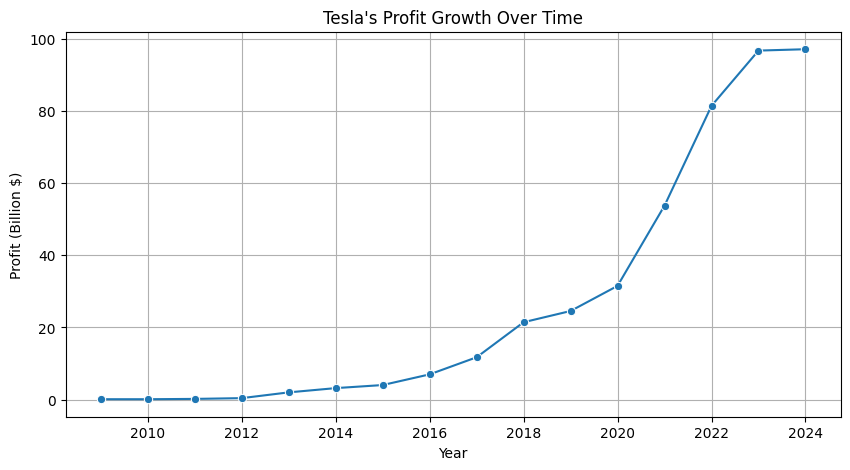

In [106]:
#Step 6: Visualize the data

import seaborn as sns

df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.sort_values('Year', inplace=True)

#LINE CHART
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Year'], y=df['Profit'], marker='o', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Profit (Billion $)")
plt.title("Tesla's Profit Growth Over Time")
plt.grid(True)
plt.show()

/tmp/ipykernel_570/994187155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Year'].dt.year, y=df['Profit'], palette='coolwarm')


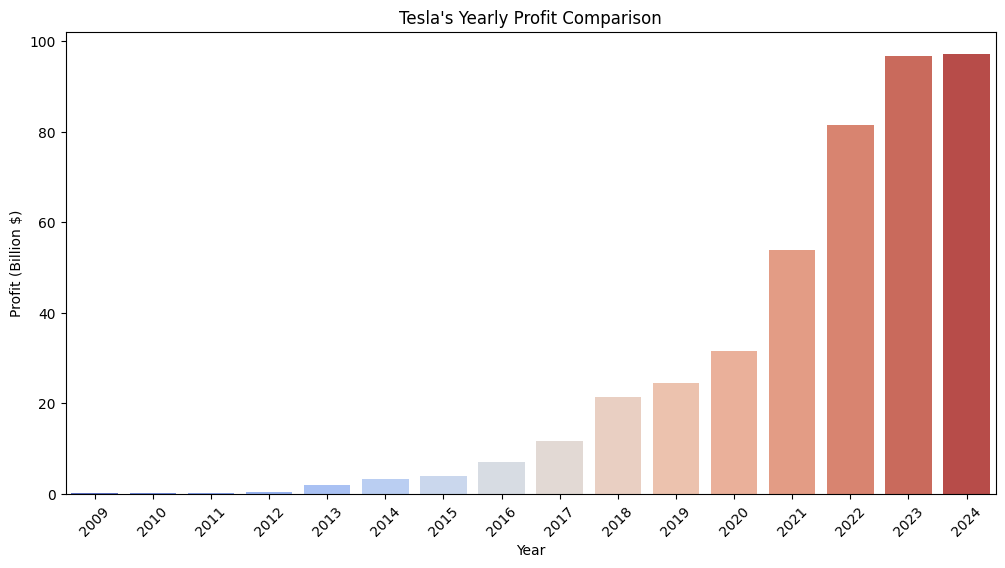

In [107]:

#BAR CHART
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Year'].dt.year, y=df['Profit'], palette='coolwarm')

plt.xlabel("Year")
plt.ylabel("Profit (Billion $)")
plt.title("Tesla's Yearly Profit Comparison")
plt.xticks(rotation=45)
plt.show()

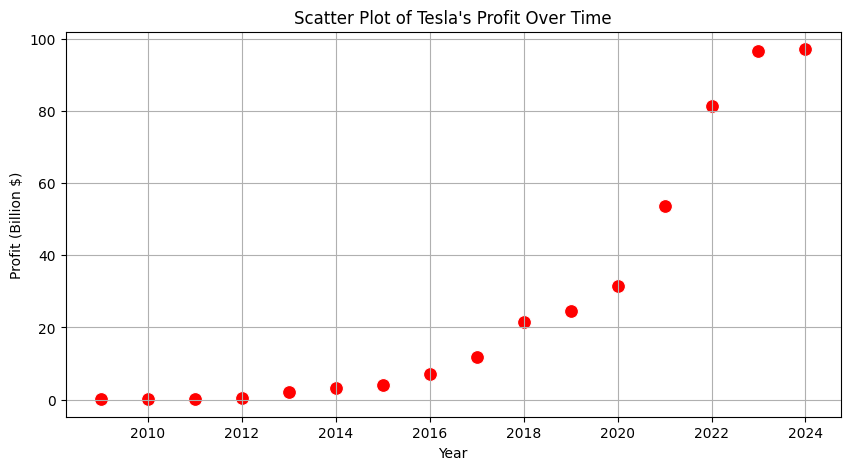

In [108]:
#SCATTER PLOT
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Year'], y=df['Profit'], color='red', s=100)

plt.xlabel("Year")
plt.ylabel("Profit (Billion $)")
plt.title("Scatter Plot of Tesla's Profit Over Time")
plt.grid(True)
plt.show()

In [110]:
#Extra excercise

earnings_url = "https://companies-market-cap-copy.vercel.app/earnings.html"
earnings_response = requests.get(earnings_url)
earnings_soup = BeautifulSoup(earnings_response.text, "html.parser")
earnings_table = earnings_soup.find("table")
latest_earnings = earnings_table.find_all("tr")[1].find_all("td")[1].text.strip()
print(f"Tesla's latest annual earnings: {latest_earnings}")

Tesla's latest annual earnings: $8.73 B
